<a href="https://colab.research.google.com/github/haedongmu/AIFFEL_quest_cr/blob/main/Exploration/Ex01/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# 모델 저장 경로
model_save_path = "/content/flower_photos/saved_model.h5"

# 데이터셋 경로
dataset_path = "/content/drive/MyDrive/flower_photos"
print("Dataset path:", dataset_path)

# 데이터셋이 존재하는지 확인
if not os.path.exists(dataset_path):
    print(f"❌ 데이터셋 폴더가 존재하지 않습니다: {dataset_path}")
    exit()  # 프로그램 종료

# **이미지 데이터셋 로드**
IMG_SIZE = 160
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# 클래스 개수 확인
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"✅ 클래스 목록: {class_names}")
print(f"✅ 클래스 개수: {num_classes}")

# **데이터 전처리 함수**
def format_example(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # 정규화 (0~1)
    return image, label

# ✅ 올바른 데이터셋 변환
train_ds = train_ds.map(format_example).cache().shuffle(1000)
val_ds = val_ds.map(format_example).cache()

Dataset path: /content/drive/MyDrive/flower_photos
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
✅ 클래스 목록: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
✅ 클래스 개수: 5


In [6]:
# **모델 로드 또는 학습**
if os.path.exists(model_save_path):
    print("✅ 저장된 모델을 찾았습니다. 모델을 로드합니다...")
    model = tf.keras.models.load_model(model_save_path)
else:
    print("🔄 저장된 모델이 없습니다. 새로 훈련을 시작합니다...")

    # **모델 생성**
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 클래스 개수 반영
    ])

    # **모델 컴파일**
    learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    # **모델 학습**
    EPOCHS = 10
    history = model.fit(train_ds,
                        epochs=EPOCHS,
                        validation_data=val_ds)

    # **모델 저장**
    model.save(model_save_path, save_format="h5")
    print(f"✅ 새로운 모델을 훈련 후 저장했습니다: {model_save_path}")


🔄 저장된 모델이 없습니다. 새로 훈련을 시작합니다...
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.3410 - loss: 1.4787 - val_accuracy: 0.5531 - val_loss: 1.0970
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5843 - loss: 1.0363 - val_accuracy: 0.5695 - val_loss: 1.0382
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6463 - loss: 0.9238 - val_accuracy: 0.6240 - val_loss: 0.9706
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6953 - loss: 0.8178 - val_accuracy: 0.5967 - val_loss: 0.9921
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7284 - loss: 0.7459 - val_accuracy: 0.6376 - val_loss: 0.9345
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7747 - loss: 0.6564 - val_accuracy: 0.6390 - val_loss: 0.9194
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7988 - loss: 0.6022 - val_accuracy: 0.6417 - val_loss: 0.9162
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8264 - loss: 

✅ 새로운 모델을 훈련 후 저장했습니다: /content/flower_photos/saved_model.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6183 - loss: 1.0264
✅ 초기 모델 성능 - loss: 0.99, accuracy: 0.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


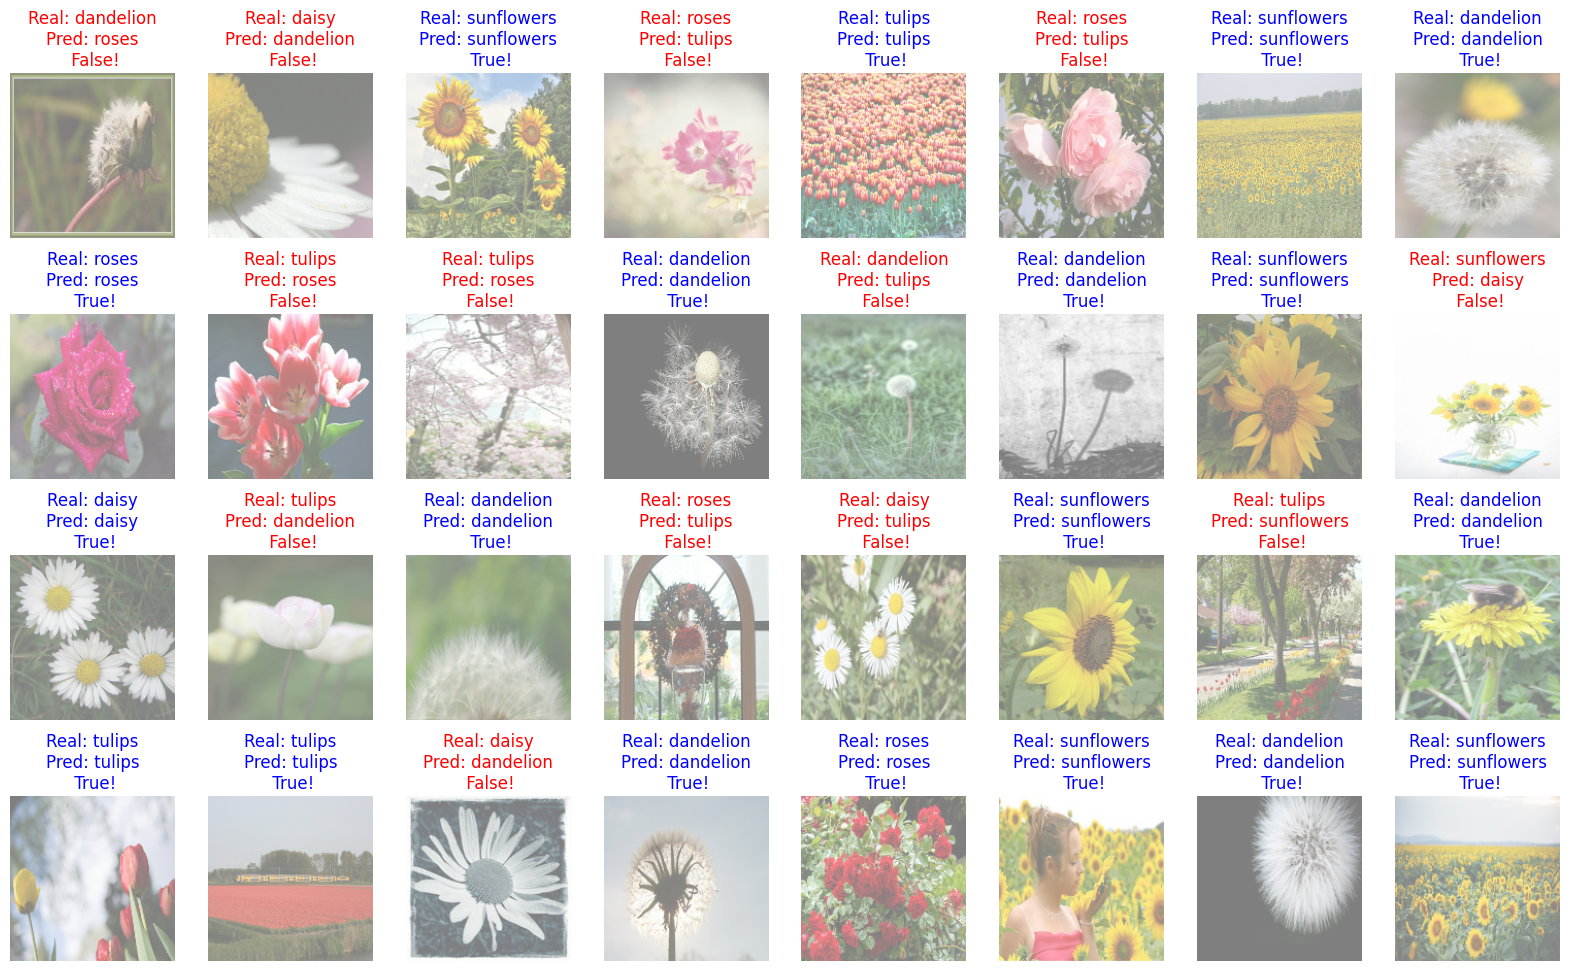

✅ 예측된 배치의 정확도: 59.38%


In [7]:
# **모델 평가**
validation_steps = 20
loss0, accuracy0 = model.evaluate(val_ds, steps=validation_steps, verbose=1)
print(f"✅ 초기 모델 성능 - loss: {loss0:.2f}, accuracy: {accuracy0:.2f}")

# **테스트 데이터에서 배치 하나 가져오기**
for image_batch, label_batch in val_ds.take(1):
    images = image_batch.numpy()
    labels = label_batch.numpy()
    predictions = model.predict(image_batch)
    break  # 첫 번째 배치만 가져오기

# **예측 결과 처리**
predictions = np.argmax(predictions, axis=1)

# **예측 결과 시각화**
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx + 1)
    image = (image + 1) / 2  # 정규화된 이미지 복원
    plt.imshow(image)
    correct = (label == prediction)
    title = f'Real: {class_names[label]}\nPred: {class_names[prediction]}\n {correct}!'

    plt.title(title, fontdict={'color': 'blue' if correct else 'red'})
    plt.axis('off')

plt.show()

# **정확도 계산**
correct_count = sum(label == prediction for label, prediction in zip(labels, predictions))
accuracy = (correct_count / len(labels)) * 100
print(f"✅ 예측된 배치의 정확도: {accuracy:.2f}%")

**<fastAPI 구성을 위한 환경설정>**

1. 패키지 설치  
pip install uvicorn fastapi python-multipart

2. ngrok 설치  
curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok

3. ngrok 인증  
ngrok config add-authtoken 토큰

4. 경로이동  
cd aiffel/fastAPI

5. 서버 실행(ngrok 보다 먼저 실행해야 함)  
python server_flower.py

6. ngrok 실행  
ngrok http 5000

7. 로컬에서 업로드 테스트(아무 경로에서나 실행하면 됨)  
curl -X GET "http://127.0.0.1:5000/uploads/tul.jpg"

8. 네트워크 업로드 테스트  
curl -X POST "https://01ab-34-145-78-56.ngrok-free.app/uploads/" -H "accept: application/json" -H "Content-Type: multipart/form-data" -F "file=@D:/rose1.jpg"

9. 플러터에서 서버 api 호출경로  
"https://13eb-34-145-78-56.ngrok-free.app/uploads/"

In [ ]:
# fastAPI 구성하기
# 서버 API (server_flower.py)
import uvicorn
from fastapi import FastAPI, UploadFile, File
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import shutil
from PIL import Image

app = FastAPI()

# 모델 로드
MODEL_PATH = "/aiffel/aiffel/fastAPI/flower_model.h5"
UPLOAD_FOLDER = "/aiffel/aiffel/fastAPI/uploads/"

# 업로드 폴더가 없으면 생성(절대 경로 기준으로 업로드 폴더가 있는지 체크해서 없으면 생성)
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

# 모델 확인 후 로드
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"❌ 모델 파일을 찾을 수 없습니다: {MODEL_PATH}")

print("🔄 모델을 로드하는 중...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("✅ 모델 로드 완료!")

# 클래스 라벨
CLASS_LABELS = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

# 업로드 폴더 설정(현재경로를 기준으로 업로드 폴더가 있는지 체크해서 없으면 생성)
UPLOAD_DIR = os.path.join(os.getcwd(), "uploads/")
if not os.path.exists(UPLOAD_DIR):
    os.makedirs(UPLOAD_DIR)

# ✅ 🔹 이미지 업로드 엔드포인트 추가 🔹 ✅
@app.post("/uploads/")
async def upload_file(file: UploadFile = File(...)): #네트워크에서 이미지 업로드시 호출되는 부분
    file_path = os.path.join(UPLOAD_FOLDER, file.filename)
    file_location = f"{UPLOAD_DIR}{file.filename}"
    with open(file_path, "wb") as buffer:
        shutil.copyfileobj(file.file, buffer)

     # ✅ 파일 업로드 로그 추가
    print(f"📂 [DEBUG] 업로드된 파일: {file.filename}") #파일명
    print(f"파일 저장 위치: {file_location}")  # 파일명을 포함한 전체경로

    # ✅ 예측 함수 호출
    prediction_result = predict_image(file_path) #predict() 함수는 비동기함수로 정의되어 있기 때문에 직접호출 할 수 없음!!

    return {
        "message": "파일 업로드 및 예측 완료",
        "filename": file.filename,
        "prediction": prediction_result
    }

def preprocess_image(image_path):
    try:
        print(f"📂 [DEBUG] 이미지 열기 시도: {image_path}")
        image = Image.open(image_path).convert("RGB")  # RGB 변환
        print(f"📂 [DEBUG] 이미지 로드 성공: {image.size}")

        # 🔥 모델이 기대하는 크기(160x160)로 조정
        image = image.resize((160, 160))
        print(f"📂 [DEBUG] 이미지 리사이징 완료: {image.size}")

        image_array = np.array(image) / 255.0  # 정규화
        print(f"📂 [DEBUG] 정규화 완료: {image_array.shape}")

        image_array = np.expand_dims(image_array, axis=0)  # 배치 차원 추가
        print(f"📂 [DEBUG] 차원 확장 완료: {image_array.shape}")

        return image_array
    except Exception as e:
        print(f"❌ [ERROR] 이미지 전처리 중 오류 발생: {e}")
        return None

# ✅ **예측 함수 (비동기 X, 동기 함수)**
def predict_image(image_path):
    try:
        processed_image = preprocess_image(image_path)
        if processed_image is None:
            return {"error": "이미지 전처리에 실패했습니다."}
        else:
            print(f"🔍 [DEBUG] 이미지 전처리 완료: {processed_image.shape}")

        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        confidence = float(np.max(prediction))

        label = CLASS_LABELS[predicted_class] if predicted_class < len(CLASS_LABELS) else "Unknown"

        print(f"✅ 예측 결과: 클래스={label}, 확률={confidence:.4f}")

        return {"label": label, "confidence": confidence}
    except Exception as e:
        print(f"❌ [ERROR] 예측 중 오류 발생: {e}")
        return {"error": str(e)}

# ✅ 🔹 특정 파일을 읽어 예측하는 API 엔드포인트 🔹 ✅
@app.get("/uploads/{filename}")
async def predict(filename: str): #로컬에서 url 요청시 바로 호출되는 함수
    file_path = os.path.join(UPLOAD_FOLDER, filename)

    print(f"🔍 [DEBUG] 예측 요청 받은 파일: {file_path}")
    print(f"🔍 [DEBUG] 파일명: {filename}")

    if not os.path.exists(file_path):
        print("❌ [ERROR] 파일이 존재하지 않음!")
        return {"error": "파일이 존재하지 않습니다."}

    prediction_result = predict_image(file_path)
    return prediction_result


# ✅ FastAPI 실행 코드 추가
# Run the server
if __name__ == "__main__":
    uvicorn.run("server_flower:app",
                reload=True,
                host="0.0.0.0",  # 외부 접속 허용
                port=5000,
                log_level="info"
                )

In [ ]:
# 플러터 기본설정
! 1. pubspec.yaml
dependencies:
  flutter:
    sdk: flutter
  http: ^0.13.5
  image_picker: ^0.8.5+3
  file_picker: ^5.2.0
  path_provider: ^2.0.11
  path: ^1.8.0
  permission_handler: ^10.0.0

flutter:
  uses-material-design: true
  assets:
      - images/
      - images/gallery/

# 2. AndroidManifest.xml(android→app→src→main)
<!-- 📌 권한 추가 -->
<uses-permission android:name="android.permission.READ_EXTERNAL_STORAGE"/>
<uses-permission android:name="android.permission.WRITE_EXTERNAL_STORAGE"/>
<uses-permission android:name="android.permission.MANAGE_EXTERNAL_STORAGE" />

**<플러터앱 파일구조>**

main.dart  

image_selector_screen.dart  이미지 분석화면

image_list_screen.dart 이미지 선택화면

custom_app_bar.dart 앱바

In [ ]:
#플러터앱
#1. main.dart
import 'package:flutter/material.dart';
import 'image_selector_screen.dart';

void main() {
  runApp(MyApp());
}

class MyApp extends StatelessWidget {
  @override
  Widget build(BuildContext context) {
    return MaterialApp(
      debugShowCheckedModeBanner: false, // ✅ 디버그 표시 제거
      title: 'Image Selector',
      theme: ThemeData(
        primarySwatch: Colors.deepPurple, // ✅ 앱 기본 테마 컬러 변경 (보라색 계열)
      ),
      home: ImageSelectorScreen(),
    );
  }
}


In [ ]:
# 2. image_selector_screen.dart

import 'package:flutter/material.dart';
import 'package:http/http.dart' as http;
import 'dart:convert';
import 'custom_app_bar.dart';
import 'image_list_screen.dart';
import 'dart:io';
import 'package:path_provider/path_provider.dart';
import 'package:flutter/services.dart';

class ImageSelectorScreen extends StatefulWidget {
  @override
  _ImageSelectorScreenState createState() => _ImageSelectorScreenState();
}

class _ImageSelectorScreenState extends State<ImageSelectorScreen> {
  String? selectedImagePath; // ✅ 선택된 이미지 저장
  String? analysisLabel; // ✅ 분석 결과 라벨
  double? analysisConfidence; // ✅ 분석 신뢰도
  final String apiUrl = "https://13eb-34-145-78-56.ngrok-free.app/uploads/";

  // 📌 이미지 선택 화면 열기
  void _openImageSelectionScreen() async {
    final selectedImage = await Navigator.push(
      context,
      MaterialPageRoute(builder: (context) => ImageListScreen()),
    );

    if (selectedImage != null && mounted) {
      setState(() {
        selectedImagePath = selectedImage;
        analysisLabel = null; // ✅ 새 이미지 선택 시 기존 결과 초기화
        analysisConfidence = null;
      });
    }
  }

  // 📌 FastAPI 서버에 이미지 업로드 및 분석 요청
  Future<void> _analyzeImage() async {
    if (selectedImagePath == null) {
      ScaffoldMessenger.of(context).showSnackBar(
        SnackBar(content: Text('먼저 이미지를 선택하세요!')),
      );
      return;
    }

    try {
      // ✅ 선택된 asset 이미지를 ByteData로 로드
      ByteData byteData = await rootBundle.load(selectedImagePath!);
      Uint8List uint8List = byteData.buffer.asUint8List();

      // ✅ 임시 디렉토리에 파일 저장
      final tempDir = await getTemporaryDirectory();
      File imageFile = File('${tempDir.path}/temp_image.jpg');
      await imageFile.writeAsBytes(uint8List);

      var request = http.MultipartRequest('POST', Uri.parse(apiUrl));
      request.files.add(await http.MultipartFile.fromPath('file', imageFile.path));

      var response = await request.send();
      if (response.statusCode == 200) {
        var responseBody = await response.stream.bytesToString();
        var jsonData = json.decode(responseBody);
        print(jsonData);
        setState(() {
          analysisLabel = jsonData['prediction']['label'] ?? "알 수 없음";
          analysisConfidence = jsonData['prediction']['confidence'] ?? 0.0;
        });
      } else {
        setState(() {
          analysisLabel = "❌ 분석 실패 (서버 응답 오류)";
          analysisConfidence = null;
        });
      }
    } catch (e) {
      setState(() {
        analysisLabel = "❌ 오류 발생: $e";
        analysisConfidence = null;
      });
    }
  }

  @override
  Widget build(BuildContext context) {
    return Scaffold(
      appBar: CustomAppBar(
        title: '꽃 이미지 분류기',
        firstPageIconPath: 'images/app_icon.png', // ✅ 아이콘 경로 추가
      ),
      body: Center( // ✅ 전체를 중앙 정렬
        child: Column(
          mainAxisAlignment: MainAxisAlignment.center,
          crossAxisAlignment: CrossAxisAlignment.center, // ✅ 중앙 정렬 추가
          children: [
            // ✅ 선택된 이미지 표시 (없으면 기본 아이콘 표시)
            Card(
              shape: RoundedRectangleBorder(borderRadius: BorderRadius.circular(10)),
              elevation: 4,
              child: Padding(
                padding: const EdgeInsets.all(16.0),
                child: selectedImagePath != null
                    ? Image.asset(selectedImagePath!, width: 200, height: 200, fit: BoxFit.cover)
                    : Icon(Icons.image, size: 100, color: Colors.grey),
              ),
            ),
            SizedBox(height: 20),

            // ✅ 분석 결과 표시
            if (analysisLabel != null)
              Padding(
                padding: const EdgeInsets.all(8.0),
                child: Column(
                  children: [
                    Text(
                      "결과: $analysisLabel",
                      style: TextStyle(
                          fontSize: 22, fontWeight: FontWeight.bold, color: Colors.black87),
                    ),
                    if (analysisConfidence != null)
                      Text(
                        "신뢰도: ${(analysisConfidence! * 100).toStringAsFixed(2)}%",
                        style: TextStyle(fontSize: 20, color: Colors.deepPurple),
                      ),
                  ],
                ),
              ),

            SizedBox(height: 20),

            // ✅ 이미지 선택 버튼 (중앙 정렬)
            SizedBox(
              width: 200, // ✅ 버튼 가로 크기 고정
              child: ElevatedButton(
                onPressed: _openImageSelectionScreen,
                style: ElevatedButton.styleFrom(
                  padding: EdgeInsets.symmetric(vertical: 15),
                  shape: RoundedRectangleBorder(borderRadius: BorderRadius.circular(8)),
                  backgroundColor: Colors.blueAccent,
                ),
                child: Text('이미지 선택', style: TextStyle(fontSize: 18, color: Colors.white)),
              ),
            ),

            SizedBox(height: 10),

            // ✅ 이미지 분석 버튼 (이미지 선택 시 활성화, 중앙 정렬)
            if (selectedImagePath != null)
              SizedBox(
                width: 200, // ✅ 버튼 가로 크기 고정
                child: ElevatedButton(
                  onPressed: _analyzeImage,
                  style: ElevatedButton.styleFrom(
                    padding: EdgeInsets.symmetric(vertical: 15),
                    shape: RoundedRectangleBorder(borderRadius: BorderRadius.circular(8)),
                    backgroundColor: Colors.green,
                  ),
                  child: Text('이미지 분석', style: TextStyle(fontSize: 18, color: Colors.white)),
                ),
              ),
          ],
        ),
      ),
    );
  }
}


In [ ]:
# 3. image_list_screen.dart

import 'package:flutter/material.dart';
import 'package:flutter/services.dart';
import 'dart:convert';
import 'custom_app_bar.dart';

class ImageListScreen extends StatelessWidget {
  Future<List<String>> _getImageList() async {
    try {
      final String manifestJson = await rootBundle.loadString('AssetManifest.json');
      final Map<String, dynamic> manifestMap = json.decode(manifestJson);

      final List<String> imagePaths = manifestMap.keys
          .where((String key) => key.startsWith('images/gallery/')) // ✅ 이미지 경로 확인
          .toList();

      return imagePaths;
    } catch (e) {
      print("❌ [ERROR] AssetManifest.json 로드 실패: $e");
      return [];
    }
  }

  @override
  Widget build(BuildContext context) {
    return Scaffold(
      appBar: CustomAppBar(title: '이미지 목록'), // ✅ 분리한 AppBar 사용
      body: FutureBuilder<List<String>>(
        future: _getImageList(),
        builder: (context, snapshot) {
          if (snapshot.connectionState == ConnectionState.waiting) {
            return Center(child: CircularProgressIndicator());
          } else if (snapshot.hasError) {
            return Center(child: Text('이미지를 불러오는 중 오류 발생'));
          } else if (!snapshot.hasData || snapshot.data!.isEmpty) {
            return Center(child: Text('등록된 이미지가 없습니다.'));
          }

          final images = snapshot.data!;
          return Padding(
            padding: const EdgeInsets.all(8.0),
            child: GridView.builder(
              gridDelegate: SliverGridDelegateWithFixedCrossAxisCount(
                crossAxisCount: 3, // ✅ 한 줄에 3개씩 표시
                crossAxisSpacing: 10,
                mainAxisSpacing: 10,
              ),
              itemCount: images.length,
              itemBuilder: (context, index) {
                return GestureDetector(
                  onTap: () {
                    Navigator.pop(context, images[index]); // ✅ 선택한 이미지 경로 반환
                  },
                  child: ClipRRect(
                    borderRadius: BorderRadius.circular(10),
                    child: Stack(
                      children: [
                        Positioned.fill(
                          child: Image.asset(
                            images[index],
                            fit: BoxFit.cover,
                          ),
                        ),
                        Positioned(
                          bottom: 5,
                          left: 5,
                          right: 5,
                          child: Container(
                            padding: EdgeInsets.all(4),
                            color: Colors.black54,
                            child: Text(
                              images[index].split('/').last, // ✅ 파일명만 표시
                              style: TextStyle(color: Colors.white, fontSize: 12),
                              textAlign: TextAlign.center,
                            ),
                          ),
                        ),
                      ],
                    ),
                  ),
                );
              },
            ),
          );
        },
      ),
    );
  }
}


In [ ]:
# 4. custom_app_bar.dart

import 'package:flutter/material.dart';

class CustomAppBar extends StatelessWidget implements PreferredSizeWidget {
  final String title;
  final String? firstPageIconPath; // ✅ 첫 페이지 아이콘 경로 지정 가능

  CustomAppBar({required this.title, this.firstPageIconPath});

  @override
  Widget build(BuildContext context) {
    bool isFirstPage = !Navigator.canPop(context); // ✅ 첫 페이지 여부 확인

    return AppBar(
      title: Text(
        title,
        style: TextStyle(
          fontSize: 22,
          fontWeight: FontWeight.bold,
          color: Colors.white, // ✅ 흰색 텍스트 유지
        ),
      ),
      centerTitle: true,
      backgroundColor: Colors.indigo, // ✅ 기존 보라색 → 네이비 계열로 변경
      elevation: 4,

      leading: isFirstPage
          ? (firstPageIconPath != null
          ? Image.asset(firstPageIconPath!, width: 30, height: 30) // ✅ 경로 지정된 아이콘
          : Icon(Icons.home, color: Colors.white)) // ✅ 기본 홈 아이콘
          : IconButton(
        icon: Icon(Icons.arrow_back, color: Colors.white),
        onPressed: () => Navigator.of(context).pop(),
      ),
    );
  }

  @override
  Size get preferredSize => Size.fromHeight(kToolbarHeight);
}